<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Ejercicios_simulaci%C3%B3n_SyS_nov_16/Punto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicio**

4. Fije los valores de los párametros del sistema rlc paralelo, con condiciones iniciales cero, para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón.

#**Simulación**

#**Circuito RLC paralelo**



*   Salida ante una entrada escalón





In [2]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C, w = sym.symbols('t R L C omega', positive=True)
X = 1 / s # entrada escalon
H=control.TransferFunction(1,(L*C)*s**2 + (L*s)/R + 1,s) #Funcion de transferencia con la API de control
H
Y = H.num * X /H.den#función de transferencia del circuito multiplicad
Y

         1          
────────────────────
  ⎛     2   L⋅s    ⎞
s⋅⎜C⋅L⋅s  + ─── + 1⎟
  ⎝          R     ⎠

para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón. Necesitamos encontrar la forma canónica SLIT de segundo orden




In [3]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)

#Entrada de interés en Laplace
X = 1/s # X(s) = 1 Respuesta entrada impulso; X(s) = 1/s resp escalón, X(s) = 1/s**2 resp a la rampa
#Forma canónica -> resolver según sistema propuesto
K = 1 #ganancia estática
wn = sym.sqrt(1/(C*L)) #frecuencia natural
xi = (sym.sqrt(L*C))/(2*R*C) #factor amortiguamiento
H = K*(wn**2/(s**2 + 2*xi*wn*s + wn**2)) #función de transferencia en lazo cerrado slit 2 orden
#Hlc = H/(1+H) #para lazo cerrado
H


         1          
────────────────────
    ⎛ 2    s     1 ⎞
C⋅L⋅⎜s  + ─── + ───⎟
    ⎝     C⋅R   C⋅L⎠


*   Respuesta subamortiguada


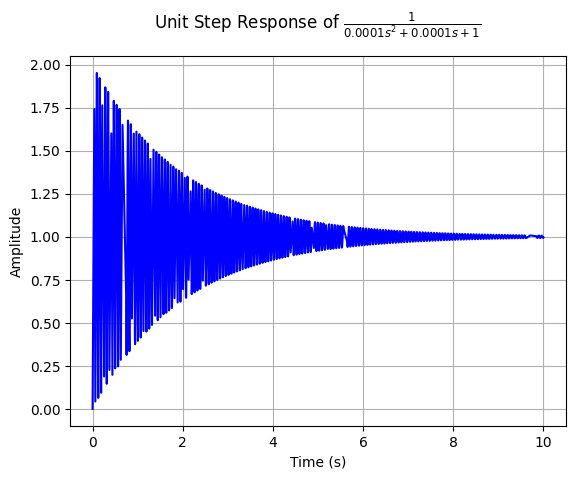

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#Fijamos valores DE R, L Y C para mostrar la respuesta subamoritguada
RLC = {R: 100, L: 0.1, C:0.0001}
sym.init_printing()
xi=(sym.sqrt(L*C))/(2*R*C) #0<xi<1

wn = sym.sqrt(1/(C*L))

H=control.TransferFunction(1,(L*C)*s**2 + (L*s)/R + 1,s)
H
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)


*  Respuesta sobreamortiguada



In [5]:
import numpy as np
import matplotlib.pyplot as plt
#Fijamos valores DE R, L Y C para mostrar la respuesta sobreamortiguada
R = R.subs({R:1})
L = L.subs({L:10})
C = C.subs({C:1})
sym.init_printing()
xi=(sym.sqrt(L*C))/(2*R*C) #xi > 1
xi


√10
───
 2 



*  Respuesta de amortiguamiento crítico



In [6]:
import numpy as np
import matplotlib.pyplot as plt
#Fijamos valores DE R, L Y C para mostrar la respuesta de amortiguamiento crítico
R = R.subs({R:1})
L = L.subs({L:4})
C = C.subs({C:1})
sym.init_printing()
xi=(sym.sqrt(L*C))/(2*R*C) #xi = 1
xi

1



*  Respuesta oscilatoria




In [7]:
import numpy as np
import matplotlib.pyplot as plt
#Fijamos valores DE R, L Y C para mostrar la respuesta de amortiguamiento crítico
R = R.subs({R:1})
L = L.subs({L:0})
C = C.subs({C:1})
sym.init_printing()
xi=(sym.sqrt(L*C))/(2*R*C) #xi = 0
xi

0



*   Respuesta inestable




In [8]:
import numpy as np
import matplotlib.pyplot as plt
#Fijamos valores DE R, L Y C para mostrar la respuesta de amortiguamiento crítico
R = R.subs({R:-1})
L = L.subs({L:1})
C = C.subs({C:1})
sym.init_printing()
xi=(sym.sqrt(L*C))/(2*R*C) #xi < 0
xi

-1/2